In [103]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Forward Euler algorithm from exercise 2.3

In [104]:
def forward_euler(x_0, F, t_sim, dt=0.01):
    n = int(t_sim / dt)
    dim = 1
    if len(np.shape(x_0)) > 0:
        dim = np.shape(x_0)[0]
    x = np.zeros((n+1,dim))
    x[0] = x_0
    t = np.zeros(n+1)
    t[0] = 0
    for i in range(n):
        dx = dt * F(x[i],t[i])
        x[i+1] = x[i] + dx
        t[i+1] = t[i] + dt
    return x, t

ERROR! Session/line number was not unique in database. History logging moved to new session 8


# Exercise Sheet 3

## 3.3

### a) spike train for varying input current

In [110]:
def spike_train(u, t):
    u -= np.mean(u)
    t_spike = t[u > 0.5*np.max(u)]
    return np.append(t_spike[0], t_spike[1:][np.diff(t_spike) > 0.1])
def spiking_rate(t_spike):
    if len(t_spike) > 1:
        return len(t_spike) / (t_spike[-1] - t_spike[0])
    else:
        return 0

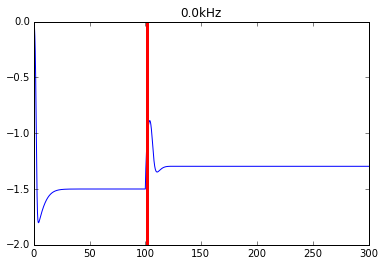

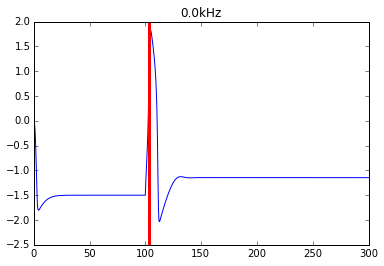

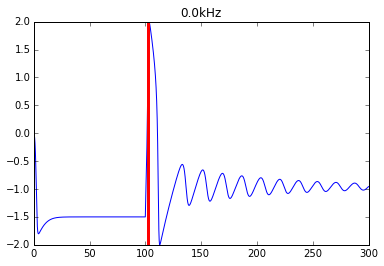

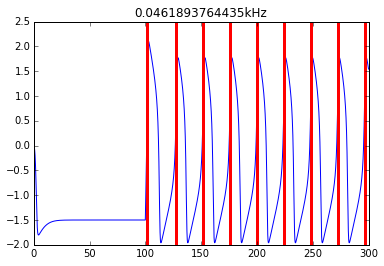

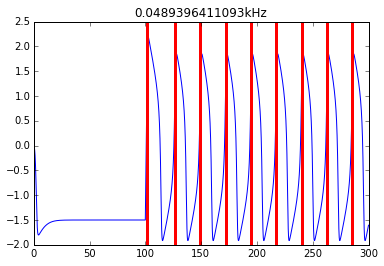

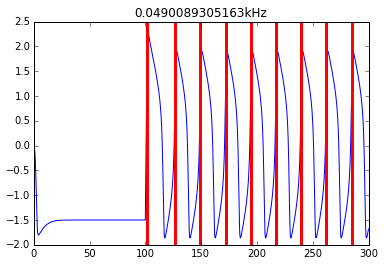

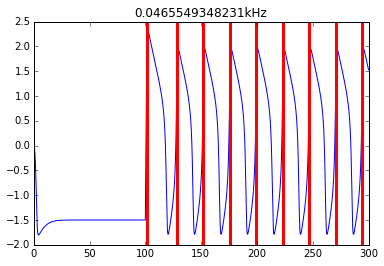

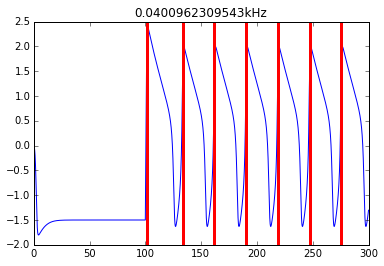

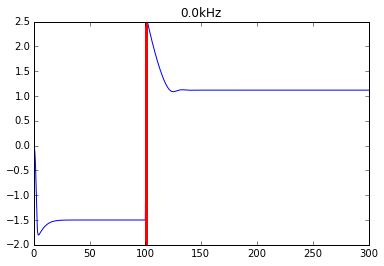

In [111]:
epsilon = 0.1
a = 15/8
b = 3/2
t_0 = 100
I_step = lambda t,I_0,t_0: I_0 if t >= t_0 else 0
I_0_list = np.arange(0.5,3,0.1)
nu = np.zeros(len(I_0_list))
for (i,I_0) in enumerate(I_0_list):
    I = lambda t: I_step(t,I_0=I_0,t_0=t_0)
    udot = lambda u,w,t: u - u**3/3 - w + I(t)
    wdot = lambda u,w,t: epsilon * (a + b*u - w)
    F_FHN = lambda x,t: np.array([udot(*x,t=t),wdot(*x,t=t)])
    x, t = forward_euler(x_0=np.array([0,0]), F=F_FHN, t_sim=300)
    t_spike = spike_train(x[t>=t_0,0],t[t>=t_0])
    nu[i] = spiking_rate(t_spike)
    if i%int(len(I_0_list)/8)==0:
        plt.figure()
        plt.plot(t,x[:,0])
        for t_s in t_spike:
            plt.axvline(t_s, c='red',lw=3)
        plt.title(str(nu[i]) + 'kHz')

### activation function

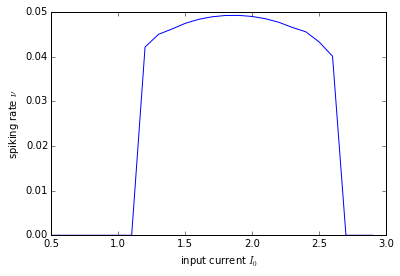

In [112]:
plt.figure()
plt.plot(I_0_list,nu)
plt.xlabel(ur'input current $I_0$')
plt.ylabel(ur'spiking rate $\nu$')